# Control_Dataset IB _Extended score

# 1.creating new dataframe for control group

In [1]:
import pandas as pd # modifiy the IB csv file with even number with 'Participant nr','Total Score extended'

# Read in the CSV file with the correct encoding
df = pd.read_csv('Questionnaire_datasetIB.csv', encoding='Windows-1252')

# Create a new DataFrame with just the two columns you want
new_df = df[['Participant nr','Total Score extended']]
# Filter out rows with odd participant numbers
new_df = new_df[new_df['Participant nr'] % 2 == 0]

# Write the new DataFrame to a CSV file
new_df.to_csv('empathy extended score IB.csv', index=False)

In [2]:
import pandas as pd # my dataframe with extented empathy score for IB(even) control

# Load the first CSV file
df1 = pd.read_csv('merged control with participant nr.csv')

# Load the second CSV file
df2 = pd.read_csv('empathy extended score IB.csv')

# Merge the two dataframes based on the 'participant_nr' column
merged_df = pd.merge(df1, df2, on='Participant nr')

# Save the merged dataframe to a new CSV file
merged_df.to_csv('final control IB.csv', index=False)

# 2. Analysis the new dataframe

# 2.1 Data Exploration

In [3]:
#Import the Necessary Libraries

import os
import math
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from scipy.stats import randint
from scipy.stats import loguniform
from IPython.display import display
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import plot_roc_curve as auc_roc
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, \
f1_score, roc_auc_score, roc_curve, precision_score, recall_score
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]
import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

In [4]:
import pandas as pd

#Loading the new dataset for control group with dataset IB
df = pd.read_csv('final control IB.csv')

# Print the first 5 rows of the dataframe to check if it has loaded correctly
print(df.head())

                                           File Name  \
0  EyeT_group_dataset_II_image_name_grey_blue_par...   
1  EyeT_group_dataset_II_image_name_grey_blue_par...   
2  EyeT_group_dataset_II_image_name_grey_blue_par...   
3  EyeT_group_dataset_II_image_name_grey_blue_par...   
4  EyeT_group_dataset_II_image_name_grey_blue_par...   

   Recording timestamp Mean  Eye movement type index Mean  Gaze point X std  \
0               34330231.92                         99.33            263.42   
1               35974882.52                         97.69            285.99   
2               37300881.19                         98.54            449.93   
3               27606382.71                         62.04            422.17   
4               46420515.08                       1131.76            145.10   

   Gaze point Y std  Gaze point left X std  Gaze point left Y std  \
0            184.02                 266.12                 186.79   
1            229.68                 290.18        

In [5]:
df.info()#Checking the dtypes of all the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 49 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   File Name                                142 non-null    object 
 1   Recording timestamp Mean                 142 non-null    float64
 2   Eye movement type index Mean             142 non-null    float64
 3   Gaze point X std                         142 non-null    float64
 4   Gaze point Y std                         142 non-null    float64
 5   Gaze point left X std                    142 non-null    float64
 6   Gaze point left Y std                    142 non-null    float64
 7   Gaze point right X std                   142 non-null    float64
 8   Gaze point right Y std                   142 non-null    float64
 9   Fixation point X std                     142 non-null    float64
 10  Fixation point Y std                     142 non-n

In [6]:
df.shape

(142, 49)

In [7]:
#Showing all columns names
df.columns

Index(['File Name', 'Recording timestamp Mean', 'Eye movement type index Mean',
       'Gaze point X std', 'Gaze point Y std', 'Gaze point left X std',
       'Gaze point left Y std', 'Gaze point right X std',
       'Gaze point right Y std', 'Fixation point X std',
       'Fixation point Y std', 'Gaze event duration max',
       'Presented Media width max', 'Presented Media height max',
       'Presented Media position X (DACSpx) max',
       'Presented Media position Y (DACSpx) max', 'Original Media width max',
       'Original Media height max', 'Pupil diameter left max',
       'Pupil diameter right max', 'Gaze direction left X std',
       'Gaze direction left Y std', 'Gaze direction left Z std',
       'Gaze direction right X std', 'Gaze direction right Y std',
       'Gaze direction right Z std', 'Eye position left X (DACSmm) std',
       'Eye position left Y (DACSmm) std', 'Eye position left Z (DACSmm) std',
       'Eye position right X (DACSmm) std',
       'Eye position right

In [8]:
#Checking number of unique rows in each feature

df.nunique().sort_values()

Presented Media position Y (DACSpx) max      1
Presented Media height max                   2
Presented Media position X (DACSpx) max      3
Original Media height max                    4
Original Media width max                     4
Presented Media width max                    4
Total Score extended                        27
Participant nr                              30
Pupil diameter left max                     77
Pupil diameter right max                    86
Eye movement type count                     99
Validity left count                         99
Validity right count                        99
Gaze event duration max                    101
Eye position right Z (DACSmm) std          118
Gaze point left X (DACSmm) std             118
Gaze point left Y (DACSmm) std             118
Gaze point right X (DACSmm) std            118
Gaze point right Y (DACSmm) std            118
Gaze point X (MCSnorm) std                 118
Gaze point right X (MCSnorm) std           118
Eye position 

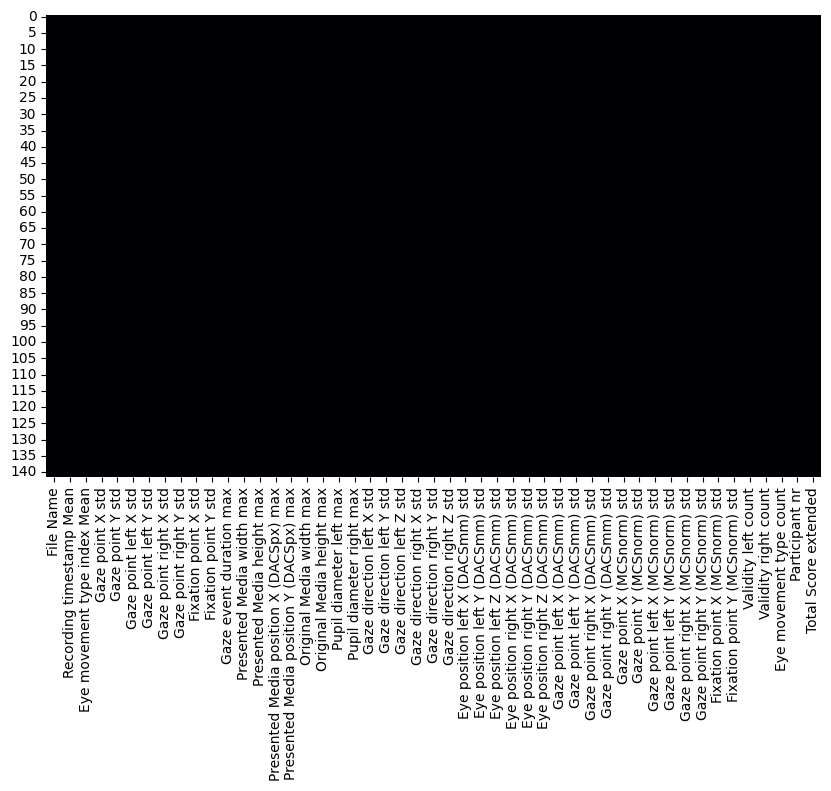

In [9]:
#null values
sns.heatmap(df.isnull(),cmap = 'magma',cbar = False);

# 2.2 Exploratory Data Analysis (EDA)

In [10]:
#Checking the stats of all the columns(statistic)

df.describe()

,Recording timestamp Mean,Eye movement type index Mean,Gaze point X std,Gaze point Y std,Gaze point left X std,Gaze point left Y std,Gaze point right X std,Gaze point right Y std,Fixation point X std,Fixation point Y std,Gaze event duration max,Presented Media width max,Presented Media height max,Presented Media position X (DACSpx) max,Presented Media position Y (DACSpx) max,Original Media width max,Original Media height max,Pupil diameter left max,Pupil diameter right max,Gaze direction left X std,Gaze direction left Y std,Gaze direction left Z std,Gaze direction right X std,Gaze direction right Y std,Gaze direction right Z std,Eye position left X (DACSmm) std,Eye position left Y (DACSmm) std,Eye position left Z (DACSmm) std,Eye position right X (DACSmm) std,Eye position right Y (DACSmm) std,Eye position right Z (DACSmm) std,Gaze point left X (DACSmm) std,Gaze point left Y (DACSmm) std,Gaze point right X (DACSmm) std,Gaze point right Y (DACSmm) std,Gaze point X (MCSnorm) std,Gaze point Y (MCSnorm) std,Gaze point left X (MCSnorm) std,Gaze point left Y (MCSnorm) std,Gaze point right X (MCSnorm) std,Gaze point right Y (MCSnorm) std,Fixation point X (MCSnorm) std,Fixation point Y (MCSnorm) std,Validity left count,Validity right count,Eye movement type count,Participant nr,Total Score extended
count,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00
mean,38813581.16,209.33,279.54,236.91,281.07,240.61,268.61,227.37,258.02,222.64,1614.51,1789.13,1441.76,223.32,0.00,1294.56,1139.58,134.25,134.31,1501.22,1494.51,839.24,1455.06,1408.18,806.53,61.06,61.65,125.44,54.90,60.49,123.08,521.31,562.49,487.06,531.74,857.51,982.56,798.63,923.64,770.41,875.01,40.51,41.47,7518.04,7518.04,7518.04,26.92,99.97
std,16951572.70,174.08,76.19,55.81,79.57,60.53,77.36,56.42,82.46,57.28,1405.86,733.11,847.88,108.75,0.00,1079.69,1142.21,39.03,39.47,718.51,673.72,309.64,757.70,677.91,315.50,55.90,45.98,112.12,48.03,40.05,108.74,195.63,163.44,192.88,172.15,284.61,317.34,286.09,320.79,296.74,333.41,26.27,28.21,3678.08,3678.08,3678.08,18.42,20.36
min,10352286.81,39.84,74.70,76.40,76.66,76.69,73.26,76.52,61.08,75.45,425.00,1245.00,1080.00,129.00,0.00,640.00,416.00,45.00,35.00,158.90,169.71,138.82,89.98,63.55,56.28,6.10,9.87,14.65,6.02,9.55,10.59,96.66,121.52,60.86,61.13,118.73,152.88,118.69,149.69,88.84,53.70,5.05,5.45,639.00,639.00,639.00,2.00,53.00
25%,33895836.66,109.93,234.90,204.71,235.33,205.66,222.97,189.71,202.73,189.51,834.50,1245.00,1080.00,129.00,0.00,640.00,416.00,104.00,108.00,1277.54,1267.73,661.32,1182.28,1135.67,653.67,13.74,28.29,54.55,13.92,31.15,55.21,424.98,488.00,370.28,422.27,721.45,818.67,642.38,752.41,610.14,688.39,28.12,28.22,7212.75,7212.75,7212.75,8.00,83.25
50%,35347494.16,150.84,279.84,244.70,281.76,240.85,269.79,237.55,253.08,227.37,1162.50,1662.00,1080.00,129.00,0.00,798.00,692.00,127.00,126.00,1534.93,1537.48,850.70,1504.84,1476.39,824.91,39.79,45.46,82.29,39.35,43.60,76.63,541.87,597.19,525.62,555.03,899.30,1034.89,829.29,954.11,792.49,878.29,38.54,39.91,7259.50,7259.50,7259.50,24.00,98.00
75%,38972666.71,248.96,334.49,270.63,341.20,272.48,325.90,264.64,301.98,265.99,1976.50,1662.00,1080.00,337.00,0.00,798.00,692.00,156.75,154.00,1681.07,1693.69,1038.64,1716.19,1675.00,1048.84,93.47,82.83,158.31,88.80,85.05,165.52,628.18,676.07,580.41,654.96,1014.93,1149.90,959.33,1113.51,962.97,1046.75,49.48,50.08,7512.00,7512.00,7512.00,43.50,119.00
max,118250821.83,1131.76,449.93,371.15,454.05,496.87,433.63,372.84,451.34,360.59,12156.00,3415.00,3415.00,420.00,0.00,3415.00,3415.00,269.00,240.00,4941.17,4630.63,1457.63,4973.57,4367.73,1449.64,219.53,234.31,508.96,222.52,187.54,479.61,1092.24,922.97,1086.55,896.33,1582.67,2013.26,1580.20,2004.68,1567.09,1967.60,170.28

In [11]:
pd.options.display.float_format = '{:.2f}'.format

<AxesSubplot:>

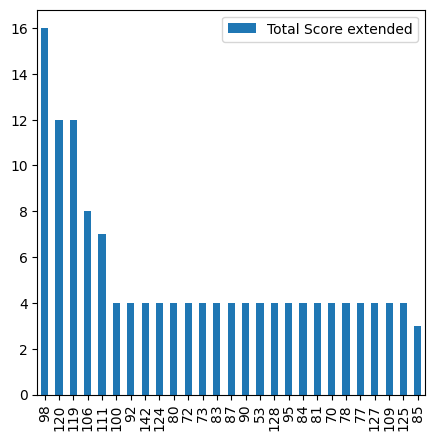

In [12]:
pd.DataFrame(df["Total Score extended"].value_counts()).plot(kind="bar",figsize=(5,5))

In [13]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
df["Total Score extended"] = le.fit_transform(df["Total Score extended"])

# Print the unique values of the encoded target variable to check if it has been labeled correctly
print(df["Total Score extended"].unique())

[16 25 19 21 18 24  4 10  5  1  7  9 14 12  0 13 11  8  3 17  2  6 20 15
 22 26 23]


array([[<AxesSubplot:title={'center':'Recording timestamp Mean'}>,
        <AxesSubplot:title={'center':'Eye movement type index Mean'}>,
        <AxesSubplot:title={'center':'Gaze point X std'}>,
        <AxesSubplot:title={'center':'Gaze point Y std'}>,
        <AxesSubplot:title={'center':'Gaze point left X std'}>,
        <AxesSubplot:title={'center':'Gaze point left Y std'}>,
        <AxesSubplot:title={'center':'Gaze point right X std'}>],
       [<AxesSubplot:title={'center':'Gaze point right Y std'}>,
        <AxesSubplot:title={'center':'Fixation point X std'}>,
        <AxesSubplot:title={'center':'Fixation point Y std'}>,
        <AxesSubplot:title={'center':'Gaze event duration max'}>,
        <AxesSubplot:title={'center':'Presented Media width max'}>,
        <AxesSubplot:title={'center':'Presented Media height max'}>,
        <AxesSubplot:title={'center':'Presented Media position X (DACSpx) max'}>],
       [<AxesSubplot:title={'center':'Presented Media position Y (DACSpx)

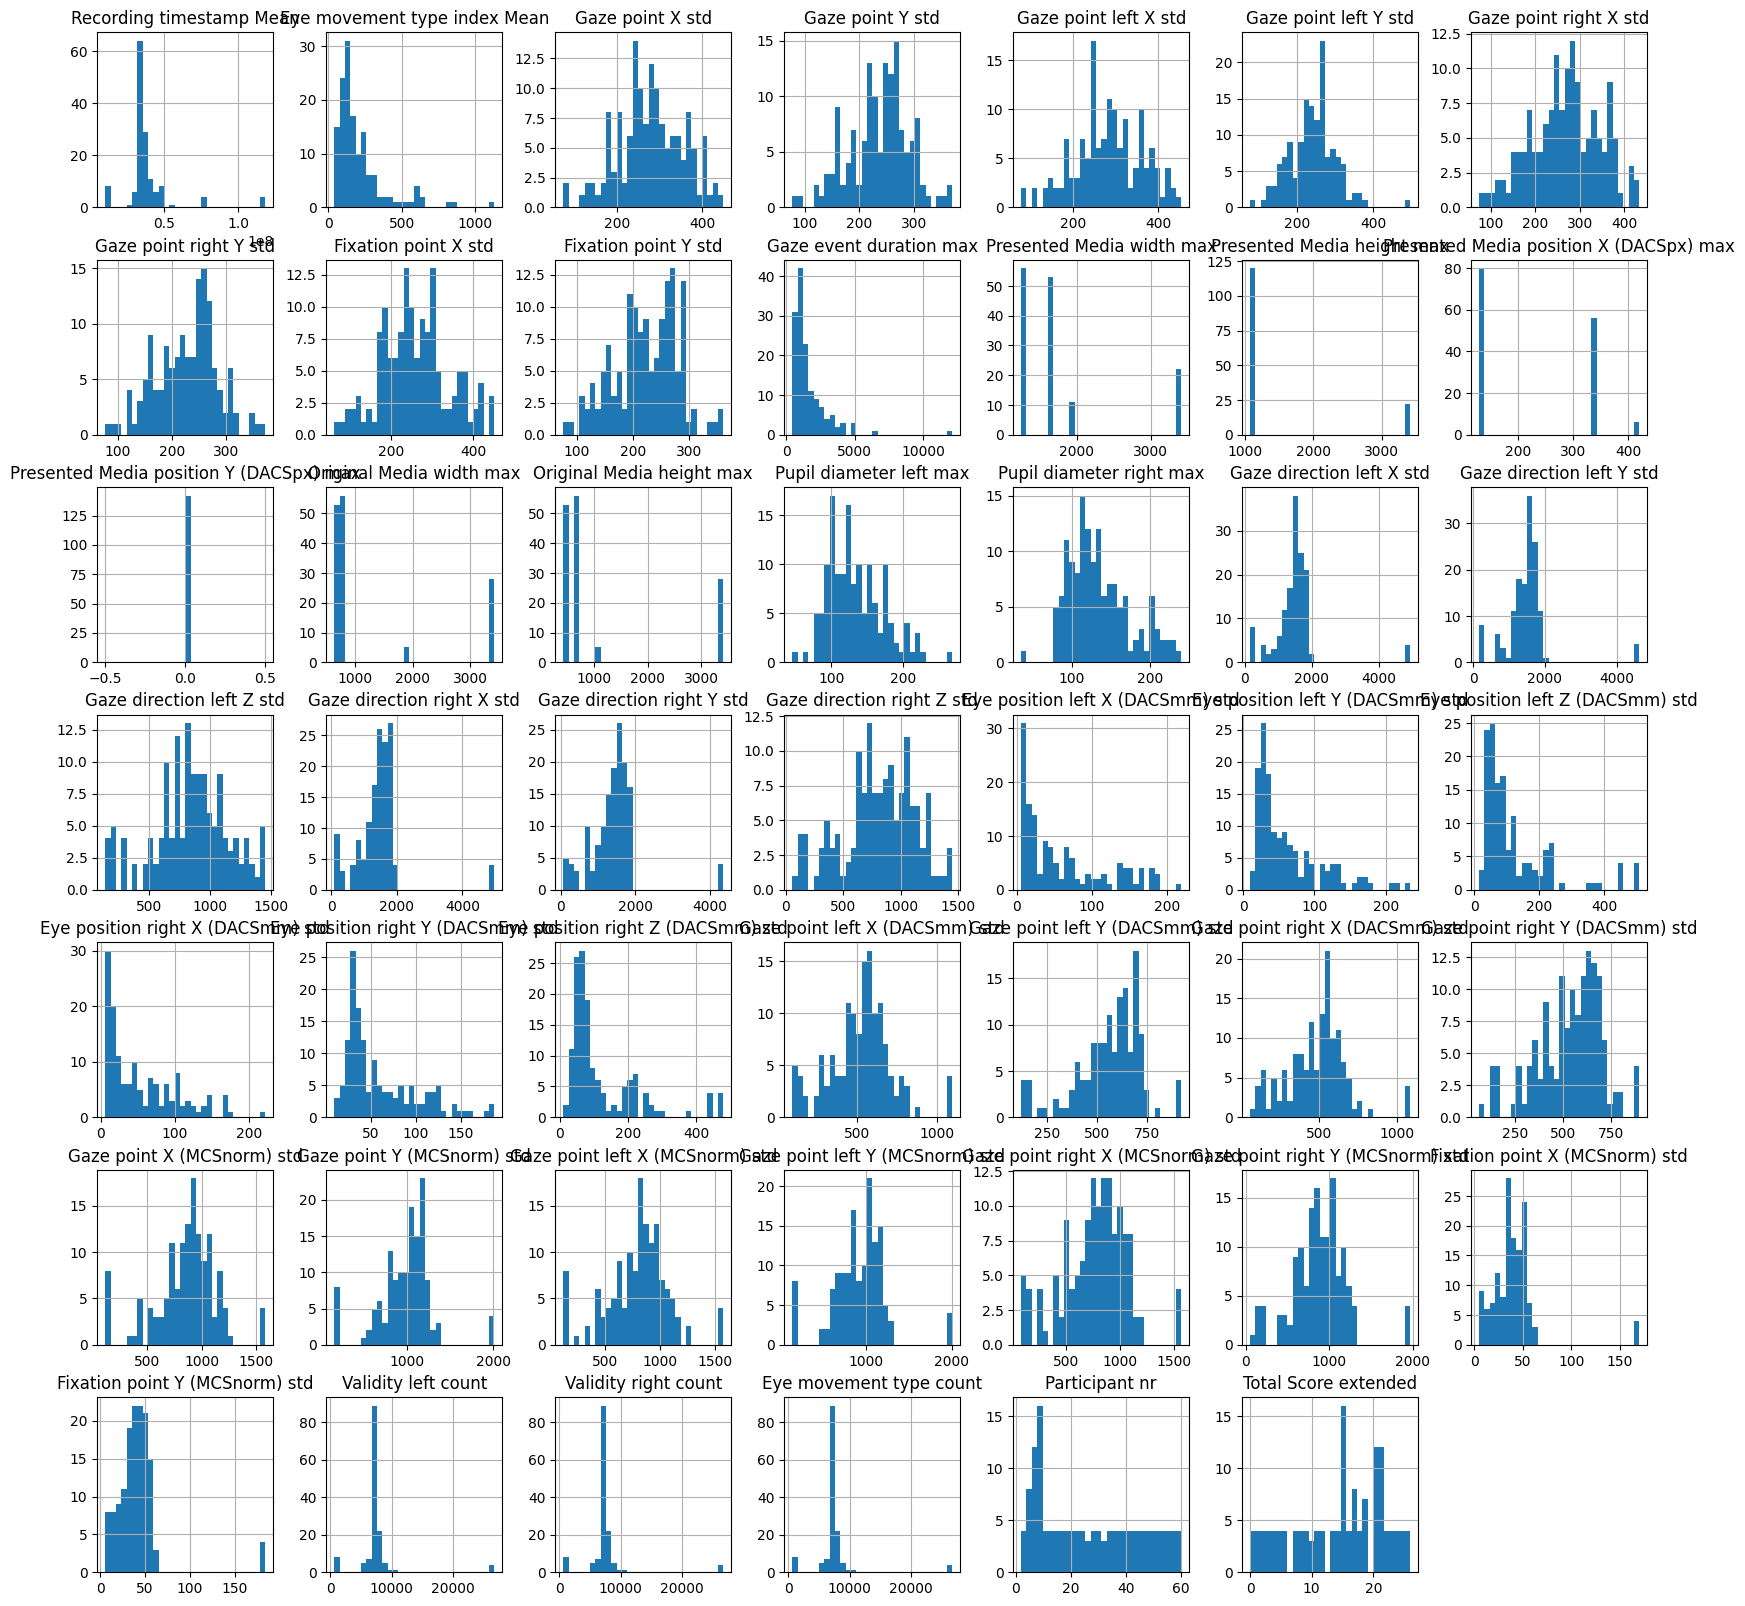

In [14]:
df.hist(bins=30, figsize=(20,20))

The histograms show that each feature has a different distribution range, indicating the need for scaling before making predictions.

In [15]:
s1 = df[df['Total Score extended'] == 98].describe().T
s2= df[df['Total Score extended'] == 120].describe().T
s3 = df[df['Total Score extended'] == 119].describe().T
s4 = df[df['Total Score extended'] == 106].describe().T
s5 = df[df['Total Score extended'] == 111].describe().T
s6= df[df['Total Score extended'] == 100].describe().T
s7 = df[df['Total Score extended'] == 92].describe().T
s8 = df[df['Total Score extended'] == 142].describe().T
s9 = df[df['Total Score extended'] == 124].describe().T
s10 = df[df['Total Score extended'] == 80].describe().T
s11 = df[df['Total Score extended'] == 72].describe().T
s12 = df[df['Total Score extended'] == 73].describe().T
s13 = df[df['Total Score extended'] == 83].describe().T
s14 = df[df['Total Score extended'] == 87].describe().T
s15 = df[df['Total Score extended'] == 90].describe().T
s16 = df[df['Total Score extended'] == 53].describe().T
s17 = df[df['Total Score extended'] == 128].describe().T
s18 = df[df['Total Score extended'] == 95].describe().T
s19 = df[df['Total Score extended'] == 84].describe().T
s20 = df[df['Total Score extended'] == 81].describe().T
s21 = df[df['Total Score extended'] == 70].describe().T
s22 = df[df['Total Score extended'] == 78].describe().T
s23 = df[df['Total Score extended'] == 77].describe().T
s24 = df[df['Total Score extended'] == 127].describe().T
s25 = df[df['Total Score extended'] == 109].describe().T
s26 = df[df['Total Score extended'] == 125].describe().T
s27 = df[df['Total Score extended'] == 85].describe().T

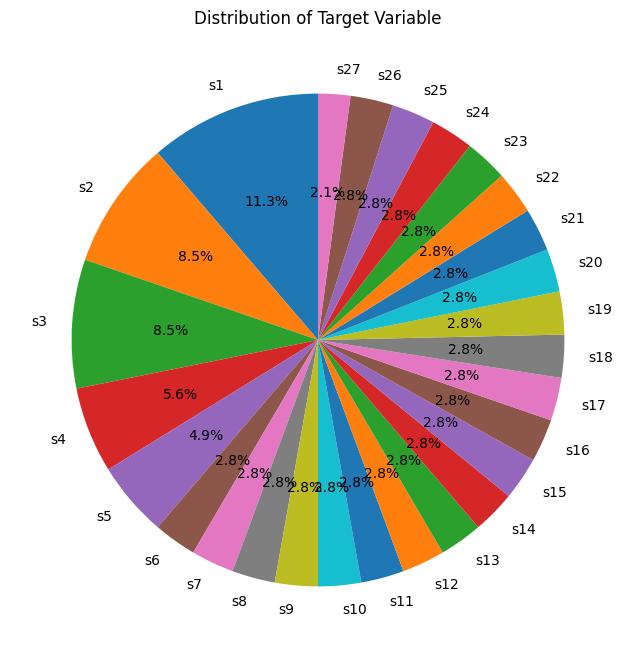

In [16]:
import matplotlib.pyplot as plt

# Replace "target_variable" with the name of your target variable column in your dataframe
target_counts = df["Total Score extended"].value_counts()

# Create a pie chart showing the distribution of the target variable
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(target_counts.values, labels = ['s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21','s22','s23','s24','s25','s26','s27'], autopct='%1.1f%%', startangle=90)
ax.set_title('Distribution of Target Variable')
plt.show()


There are 27 types of target values. I named them S1,S2 like this upto S18. The pie chart represent the ratio of target variable.

In [17]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical features:", numerical_features)
print("Categorical features:", categorical_features)

Numerical features: ['Recording timestamp Mean', 'Eye movement type index Mean', 'Gaze point X std', 'Gaze point Y std', 'Gaze point left X std', 'Gaze point left Y std', 'Gaze point right X std', 'Gaze point right Y std', 'Fixation point X std', 'Fixation point Y std', 'Gaze event duration max', 'Presented Media width max', 'Presented Media height max', 'Presented Media position X (DACSpx) max', 'Presented Media position Y (DACSpx) max', 'Original Media width max', 'Original Media height max', 'Pupil diameter left max', 'Pupil diameter right max', 'Gaze direction left X std', 'Gaze direction left Y std', 'Gaze direction left Z std', 'Gaze direction right X std', 'Gaze direction right Y std', 'Gaze direction right Z std', 'Eye position left X (DACSmm) std', 'Eye position left Y (DACSmm) std', 'Eye position left Z (DACSmm) std', 'Eye position right X (DACSmm) std', 'Eye position right Y (DACSmm) std', 'Eye position right Z (DACSmm) std', 'Gaze point left X (DACSmm) std', 'Gaze point lef

Colunm Dropping

In [18]:
df.drop(['File Name', 'Participant nr'], axis=1, inplace=True)#we dropped the variable file name and participant number

In [19]:
df.shape

(142, 47)

In [20]:
df.duplicated().sum()

0

# 2.3 Data Manipulation

In [21]:
from sklearn.model_selection import train_test_split
# Split data into features (X) and target variable (y)
X = df.drop("Total Score extended", axis=1)
y = df["Total Score extended"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2.4Predictive Modeling

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, LeaveOneOut

# Define X and y (assuming X contains your feature data and y contains your target variable)
X = df.drop("Total Score extended", axis=1)
y = df["Total Score extended"]


# Initialize random forest model
rf_model = RandomForestClassifier(random_state=42)

# Define cross-validation method
cv = LeaveOneOut()

# Perform cross-validation and calculate mean accuracy, precision, recall, and F1 score
accuracy = cross_val_score(rf_model, X, y, cv=cv, scoring='accuracy').mean()
precision = cross_val_score(rf_model, X, y, cv=cv, scoring='precision_macro').mean()
recall = cross_val_score(rf_model, X, y, cv=cv, scoring='recall_macro').mean()
f1_score = cross_val_score(rf_model, X, y, cv=cv, scoring='f1_macro').mean()

# Print results
print("Random Forest Results")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")

Random Forest Results
Accuracy: 46.48%
Accuracy: 0.4647887323943662
Precision: 0.4647887323943662
Recall: 0.4647887323943662
F1 Score: 0.4647887323943662


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, LeaveOneOut

# Define X and y (assuming X contains your feature data and y contains your target variable)
X = df.drop("Total Score extended", axis=1)
y = df["Total Score extended"]

# Initialize logistic regression model
lr_model = LogisticRegression(random_state=42)

# Define cross-validation method
cv = LeaveOneOut()

# Perform cross-validation and calculate mean accuracy, precision, recall, and F1 score
accuracy = cross_val_score(lr_model, X, y, cv=cv, scoring='accuracy').mean()
precision = cross_val_score(lr_model, X, y, cv=cv, scoring='precision_macro').mean()
recall = cross_val_score(lr_model, X, y, cv=cv, scoring='recall_macro').mean()
f1_score = cross_val_score(lr_model, X, y, cv=cv, scoring='f1_macro').mean()

# Print results
print("Logistic Regression Results")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")

Logistic Regression Results
Accuracy: 10.56%
Accuracy: 0.1056338028169014
Precision: 0.1056338028169014
Recall: 0.1056338028169014
F1 Score: 0.1056338028169014


In [24]:
import pandas as pd

# Create empty DataFrame
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])


# Add results for Random Forest model
results_df = results_df.append({'Model': 'Random Forest', 
                                'Accuracy': 0.4647887323943662, 
                                'Precision':  0.4647887323943662, 
                                'Recall': 0.4647887323943662, 
                                'F1 Score': 0.4647887323943662}, 
                               ignore_index=True)

# Add results for Logistic Regression model
results_df = results_df.append({'Model': 'Logistic Regression', 
                                'Accuracy':0.1056338028169014, 
                                'Precision':0.1056338028169014, 
                                'Recall': 0.1056338028169014, 
                                'F1 Score': 0.1056338028169014}, 
                               ignore_index=True)
pd.options.display.float_format = '{:.2%}'.format
print(results_df)

                 Model  Accuracy  Precision  Recall  F1 Score
0        Random Forest    40.14%     40.14%  40.14%    40.14%
1  Logistic Regression     7.75%      7.75%   7.75%     7.75%


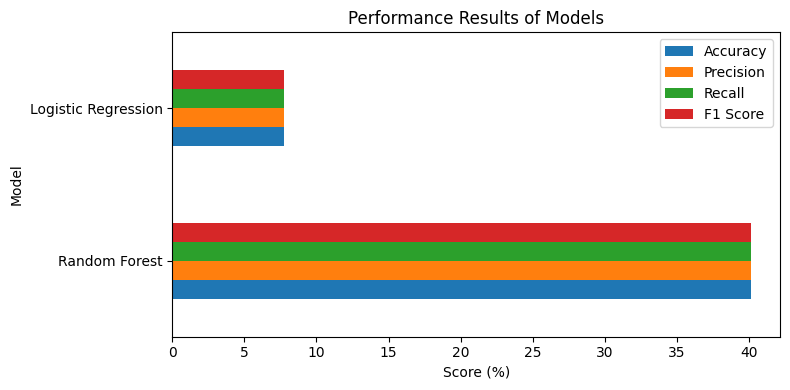

In [25]:
import pandas as pd

# Create empty DataFrame
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])


# Add results for Random Forest model
results_df = results_df.append({'Model': 'Random Forest', 
                                'Accuracy':  0.4014084507042254, 
                                'Precision':  0.4014084507042254, 
                                'Recall': 0.4014084507042254, 
                                'F1 Score': 0.4014084507042254}, 
                               ignore_index=True)

# Add results for Logistic Regression model
results_df = results_df.append({'Model': 'Logistic Regression', 
                                'Accuracy':0.07746478873239436, 
                                'Precision': 0.07746478873239436, 
                                'Recall': 0.07746478873239436, 
                                'F1 Score': 0.07746478873239436}, 
                               ignore_index=True)
# Multiply the scores by 100 and add "%" to the x-axis label
results_df[['Accuracy', 'Precision', 'Recall', 'F1 Score']] *= 100
x_label = 'Score (%)'

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(8, 4))
results_df.plot(kind='barh', x='Model', ax=ax)
ax.set_xlabel(x_label)
ax.set_title('Performance Results of Models')
plt.tight_layout()
plt.show()